In [77]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from wordcloud import WordCloud

from textblob import TextBlob

import requests

import pandas as pd
import numpy as np

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

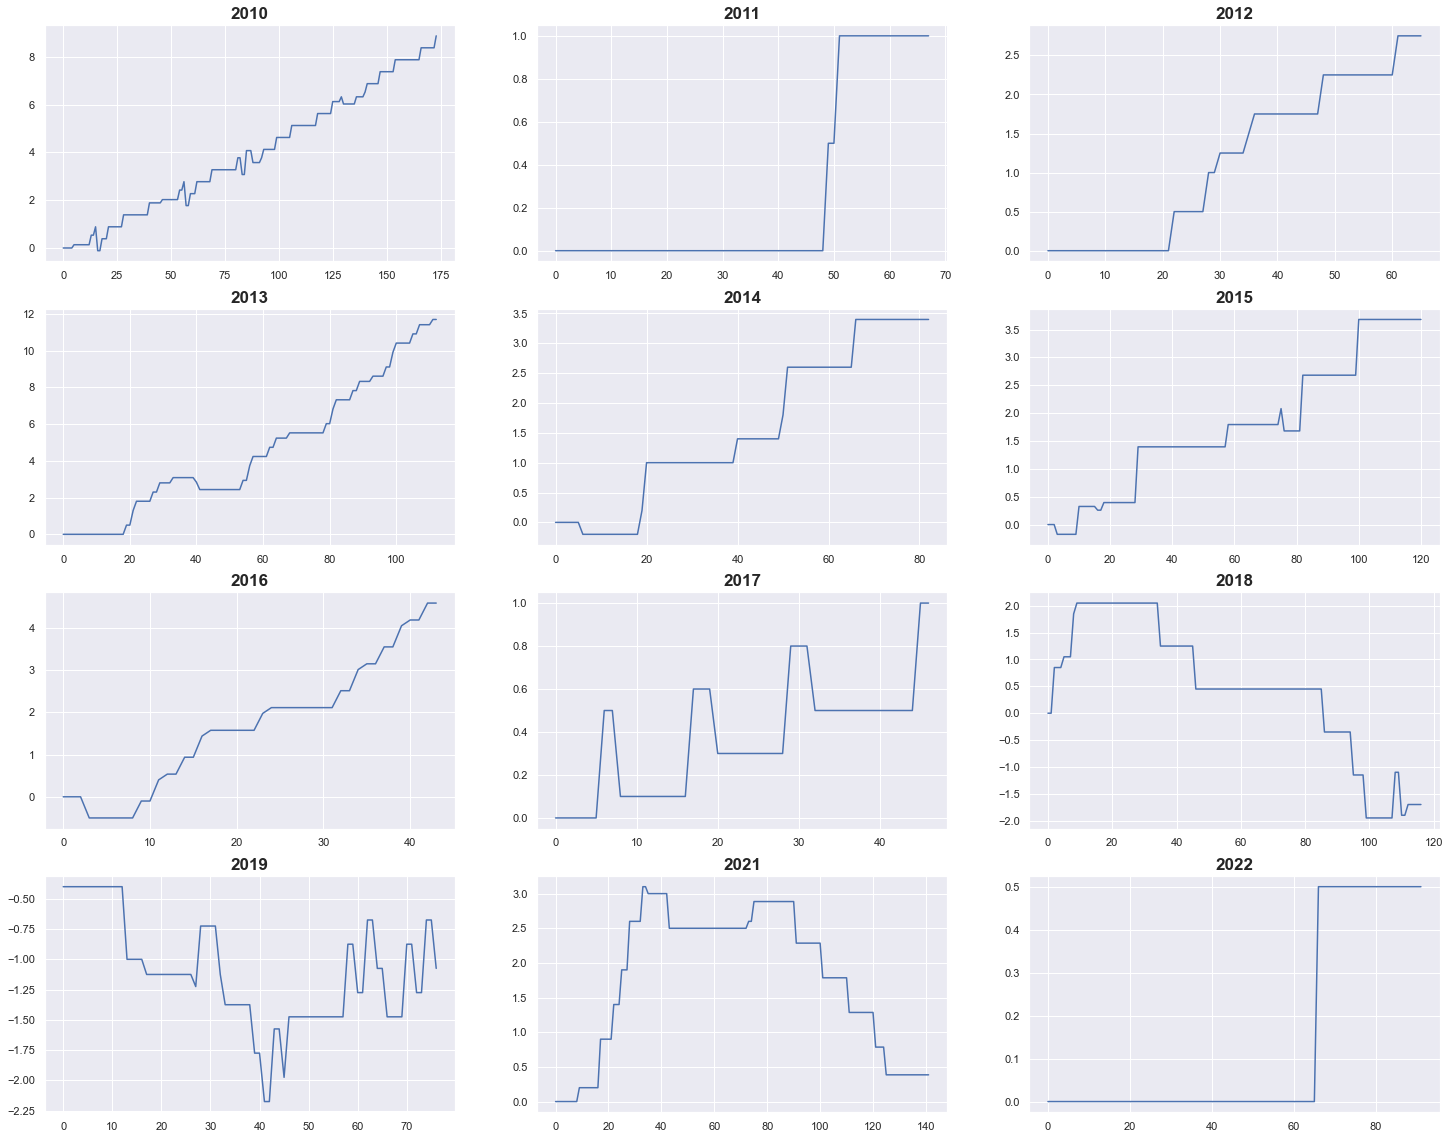

In [78]:
fig , ax = plt.subplots(4,3,figsize=(25,20))
grid_list = []

for row in range(0,4):
    for col in range(0,3):
        grid_list.append((row,col))
        
for y_id,year in enumerate(range(2010,2023)):
    if year==2020:
        continue
    else:
#         print(year)
        url="https://raw.githubusercontent.com/jackmheller/modernDataAnalytics/main/Lyrics%202/{}.txt".format(year)
        # read text file into pandas DataFrame
        df = requests.get(url)

        # display DataFrame
        text = df.text

        words = text.split()
        alphabetic_only = [word for word in words if word.isalpha()]
        lower_case = [word.lower() for word in alphabetic_only]

        sw = stopwords.words('english')
        sw.append('oh') #adding the word 'oh' to the list of stopwords
        cleaned_words = [word for word in lower_case if word not in sw]

        df = pd.DataFrame(cleaned_words)
        df.columns = ['text']
        df['sentiment_blob'] = ''


        df['sentiment_blob'] = df['text'].apply(lambda x : blob_sentiment(x))

        if year in [2021,2022]:
            y_id-=1
        ax[grid_list[y_id]].plot(np.arange(0,len(df)),df['sentiment_blob'].cumsum(),label='Text Blob')
        ax[grid_list[y_id]].set_title(year,fontsize=17,fontweight='bold')


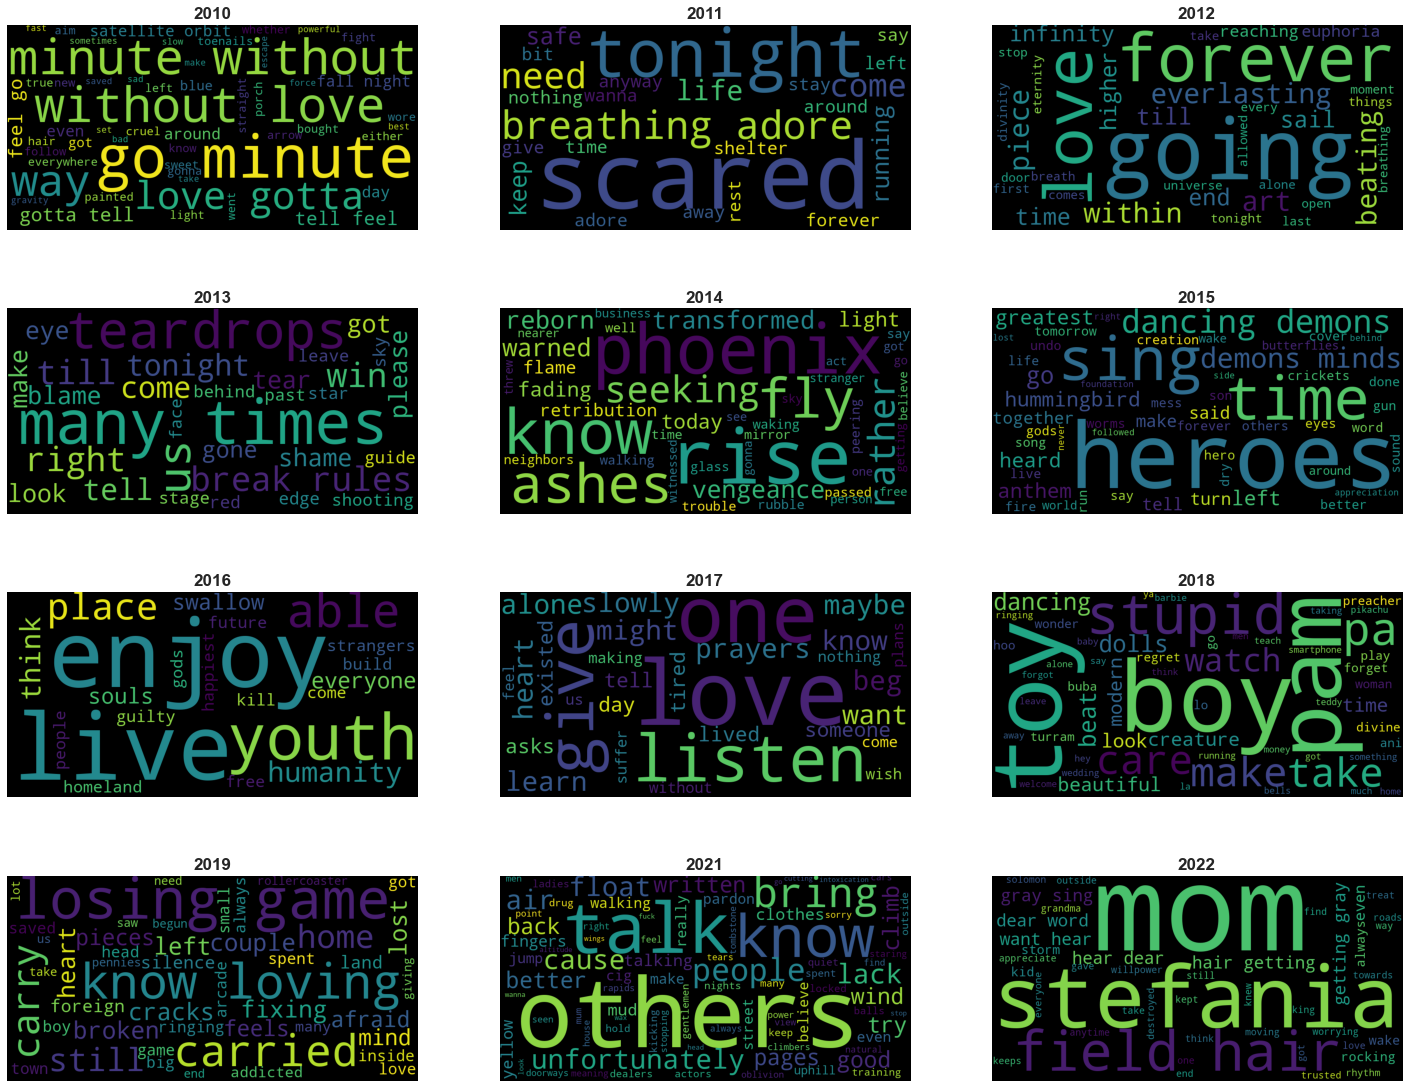

In [79]:
fig , ax = plt.subplots(4,3,figsize=(25,20))

grid_list = []

for row in range(0,4):
    for col in range(0,3):
        grid_list.append((row,col))
        
for y_id,year in enumerate(range(2010,2023)):
    if year==2020:
        continue
    else:
#         print(year)
        url="https://raw.githubusercontent.com/jackmheller/modernDataAnalytics/main/Lyrics%202/{}.txt".format(year)
        # read text file into pandas DataFrame
        df = requests.get(url)

        text = df.text

        words = text.split()
        alphabetic_only = [word for word in words if word.isalpha()]
        lower_case = [word.lower() for word in alphabetic_only]

        sw = stopwords.words('english')
        sw.append('oh') #adding the word 'oh' to the list of stopwords
        cleaned_words = [word for word in lower_case if word not in sw]

        if year in [2021,2022]:
            y_id-=1
        unique_string=(" ").join(cleaned_words)
        wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
        ax[grid_list[y_id]].imshow(wordcloud)
        ax[grid_list[y_id]].axis("off")
        ax[grid_list[y_id]].set_title(year,fontsize=17,fontweight='bold')
